<a href="https://colab.research.google.com/github/latifurrahmanalhamida/PCVK_244107027017_M-LATIFUR/blob/main/Tugas_PCVK_M_Latifur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install supervision

In [ ]:
!pip install --upgrade ultralytics supervision

In [ ]:
!pip install matplotlib-venn

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
!pip install ultralytics


0: 640x480 5 cars, 179.9ms
Speed: 4.0ms preprocess, 179.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


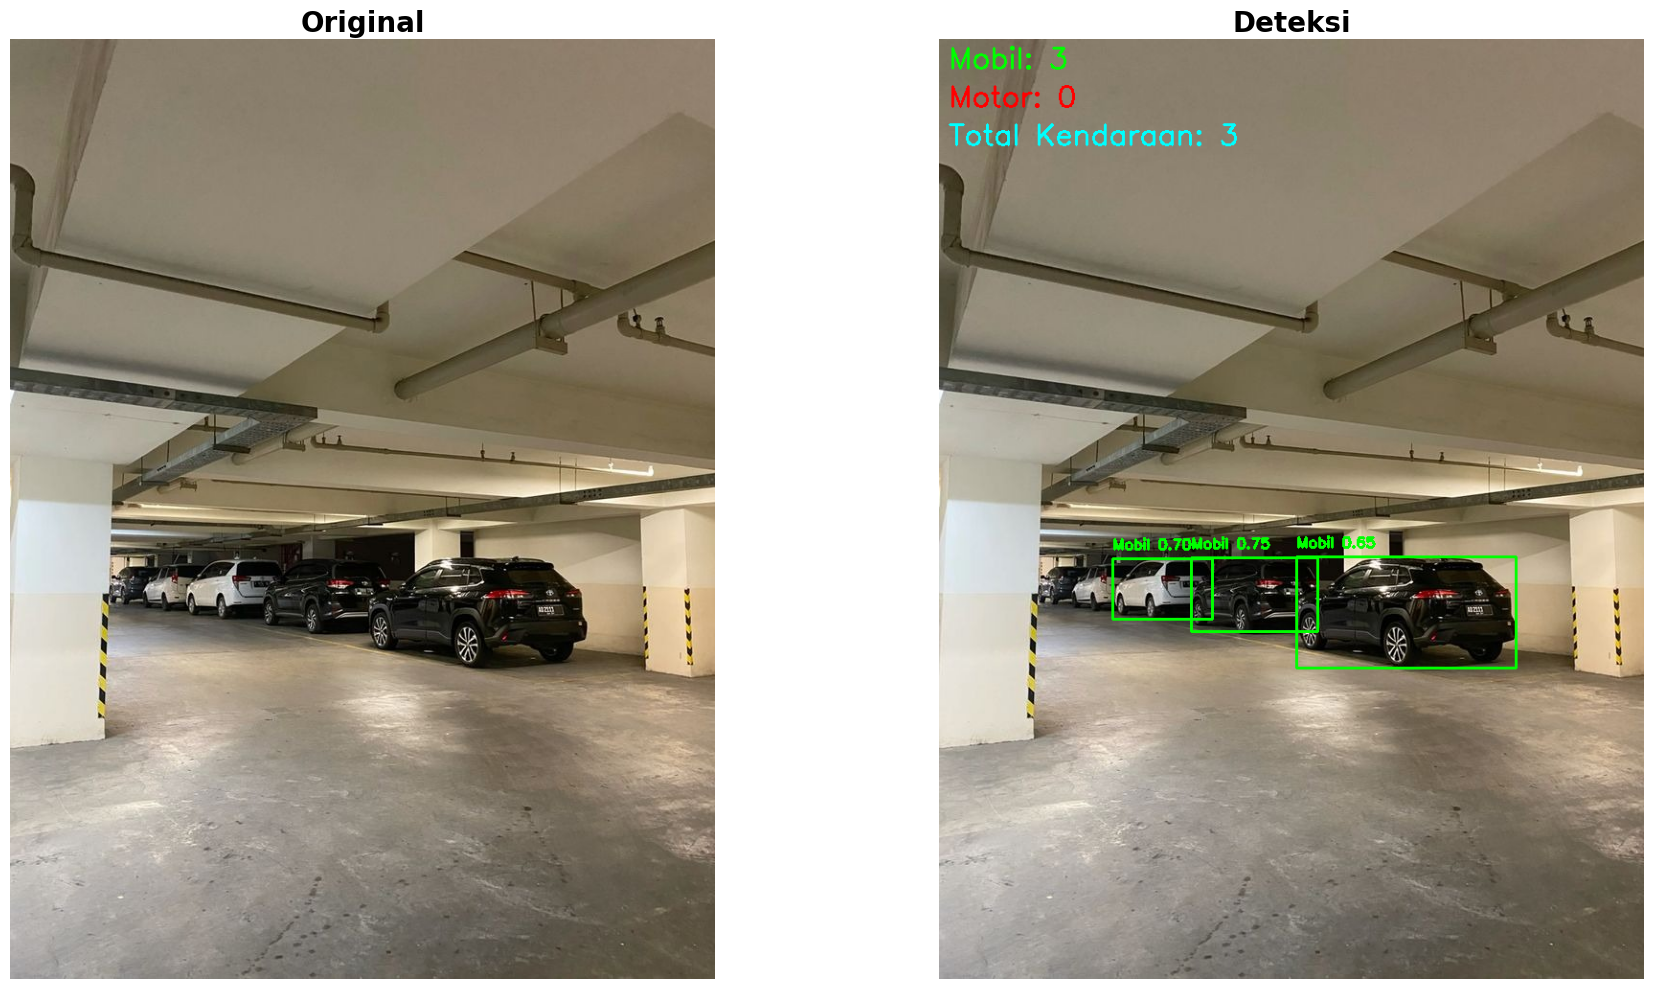


Hasil Deteksi:
Total Mobil: 3
Total Motor: 0
Total Kendaraan: 3


In [10]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(image_rgb)[0]  # Get only the first result

    # Initialize counters
    total_cars = 0
    total_motorcycles = 0

    # Copy image for annotation
    annotated_image = image_rgb.copy()

    # Process each detection
    for box in results.boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Get class_id and confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Define confidence threshold
        confidence_threshold = 0.5  # Adjust as needed

        # If detection is a car (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # If detection is a motorcycle (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Add statistics to the image
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles):
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Display original image with a border
    ax1.imshow(original_image)
    ax1.set_title("Original", fontsize=20, fontweight='bold')
    ax1.axis('off')
    plt.setp(ax1, facecolor='lightgray')

    # Display annotated image with a border
    ax2.imshow(annotated_image)
    ax2.set_title("Deteksi", fontsize=20, fontweight='bold')
    ax2.axis('off')
    plt.setp(ax2, facecolor='lightgray')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Image path
    image_path = '/content/drive/MyDrive/pcvk/parkiran 2.jpg'

    try:
        # Process detection
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # Display results
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Print detection results
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")



0: 480x640 2 cars, 1 motorcycle, 1 train, 289.3ms
Speed: 8.0ms preprocess, 289.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


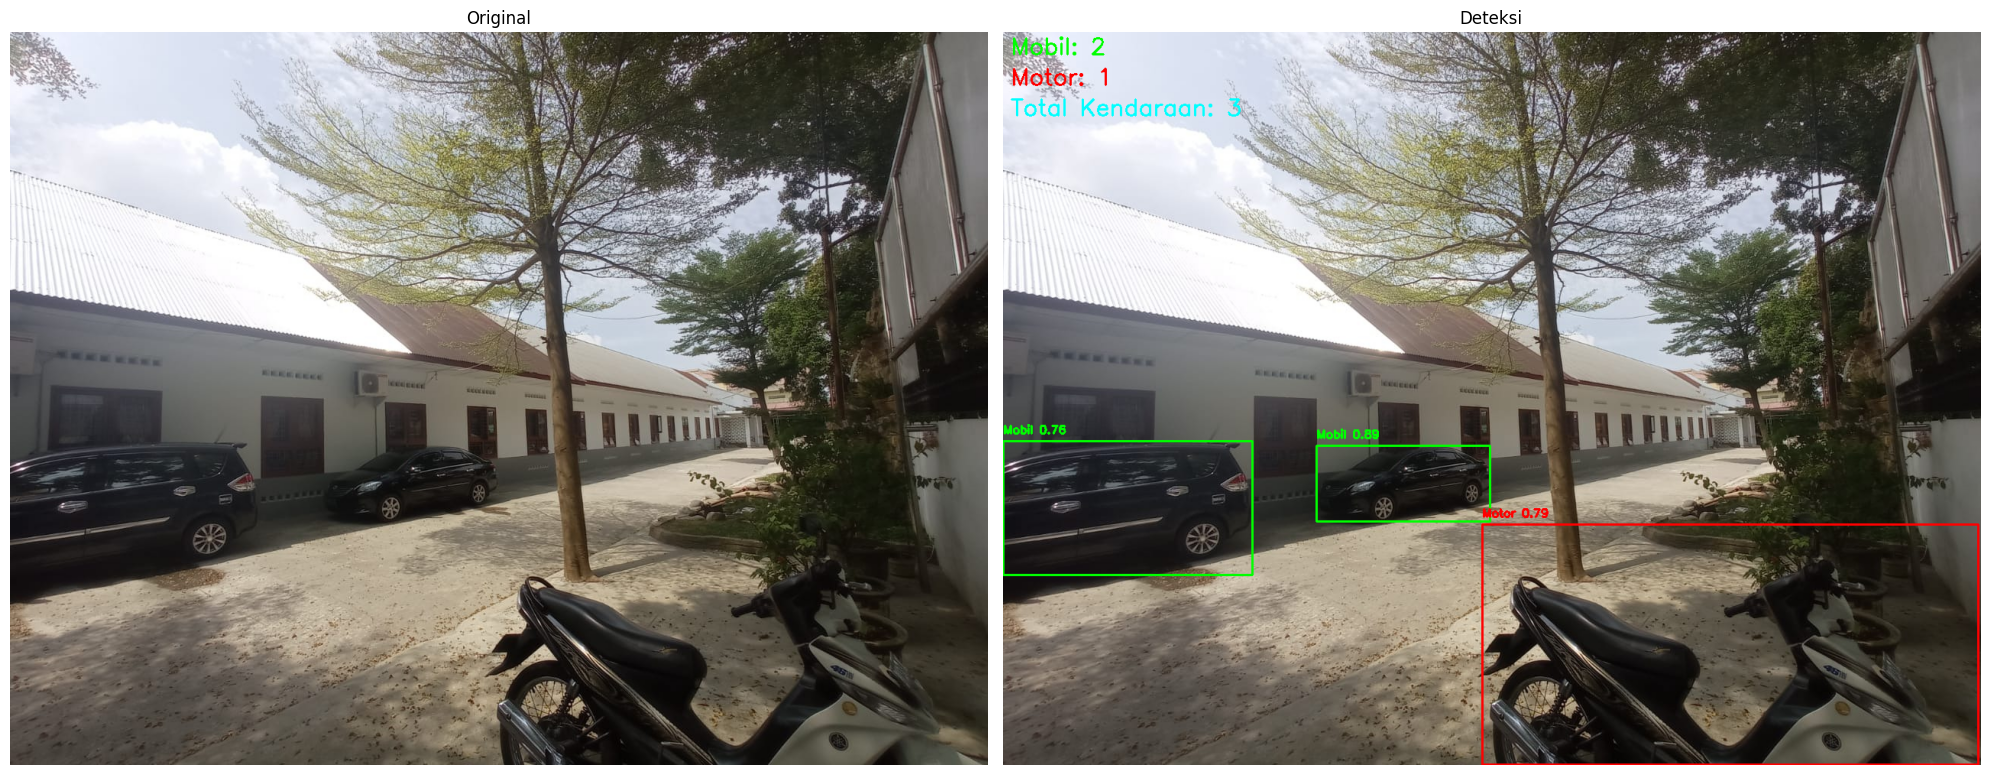


Hasil Deteksi:
Total Mobil: 2
Total Motor: 1
Total Kendaraan: 3


In [8]:
import torch
import os
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

def detect_vehicles(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Gagal membaca gambar {image_path}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(image_rgb)[0]  # Get only the first result

    # Initialize counters
    total_cars = 0
    total_motorcycles = 0

    # Copy image for annotation
    annotated_image = image_rgb.copy()

    # Process each detection
    for box in results.boxes:
        # Get box coordinates
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Get class_id and confidence
        class_id = int(box.cls.cpu().numpy()[0])
        conf = float(box.conf.cpu().numpy()[0])

        # Define confidence threshold
        confidence_threshold = 0.5  # Adjust as needed

        # If detection is a car (class 2)
        if class_id == 2 and conf >= confidence_threshold:
            total_cars += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(annotated_image, f'Mobil {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # If detection is a motorcycle (class 3)
        elif class_id == 3 and conf >= confidence_threshold:
            total_motorcycles += 1
            cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(annotated_image, f'Motor {conf:.2f}', (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Add statistics to the image
    cv2.putText(annotated_image, f"Mobil: {total_cars}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(annotated_image, f"Motor: {total_motorcycles}", (10, 70),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(annotated_image, f"Total Kendaraan: {total_cars + total_motorcycles}", (10, 110),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

    return image_rgb, annotated_image, total_cars, total_motorcycles

def display_results(original_image, annotated_image, total_cars, total_motorcycles):
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Display original image
    ax1.imshow(original_image)
    ax1.set_title("Original")
    ax1.axis('off')

    # Display annotated image
    ax2.imshow(annotated_image)
    ax2.set_title("Deteksi")
    ax2.axis('off')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Image path
    image_path = '/content/drive/MyDrive/pcvk/parkiran 3.jpg'

    try:
        # Process detection
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # Display results
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Print detection results
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")



0: 640x384 2 persons, 4 motorcycles, 264.2ms
Speed: 4.9ms preprocess, 264.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)


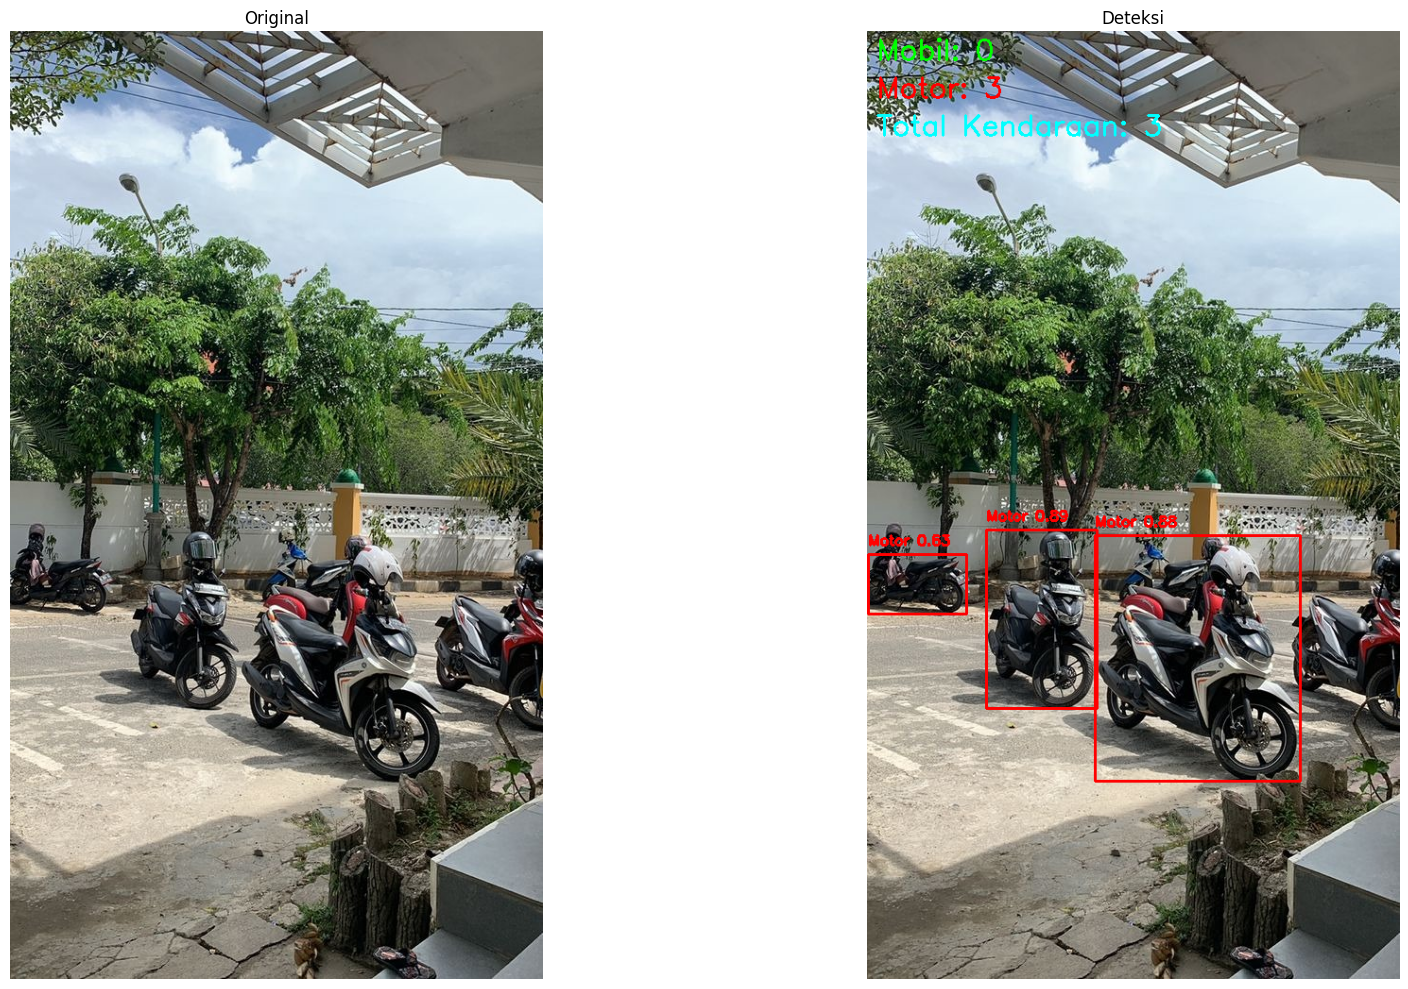


Hasil Deteksi:
Total Mobil: 0
Total Motor: 3
Total Kendaraan: 3


In [ ]:
if __name__ == "__main__":
    # Image path
    image_path = '/content/drive/MyDrive/pcvk/parkiran 4.jpg'

    try:
        # Process detection
        original_image, annotated_image, total_cars, total_motorcycles = detect_vehicles(image_path)

        # Display results
        display_results(original_image, annotated_image, total_cars, total_motorcycles)

        # Print detection results
        print("\nHasil Deteksi:")
        print(f"Total Mobil: {total_cars}")
        print(f"Total Motor: {total_motorcycles}")
        print(f"Total Kendaraan: {total_cars + total_motorcycles}")

    except Exception as e:
        print(f"Error in processing the image: {str(e)}")